# Conducción de calor en 2D: <font color=green>Caso estacionario</font>

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019**

*   Autores: 
    - Luis M. de la Cruz Salas
*   Rev: mar nov 10 12:35:18 CDT 2020

<img src="./Figuras/conceptualCOMPLETO.png" style="width: 300px;"/>

<div>
 <img src="./Figuras/condCalor2D.png"  hspace="5" vspace="5" style="float: right; width:150px"/>
    Estudiar la conducción de calor en una placa en dos dimensiones, como la que se muestra en la figura. La lontitud vertical de la placa es el doble que la longitud horizontal: $Ly = 2Lx$.
    Las condiciones de frontera son de tipo Dirichlet, es decir, la temperatura está dada en las paredes de la placa.
    En la figura se distingue $T_L, T_R, T_T$ y $T_B$ que corresponden a las temperaturas dadas en las paredes izquierda (LEFT), derecha (RIGHT), arriba (TOP) y abajo (BOTTOM), respectivamente. En este ejemplo tenemos los siguiente valores:
    
$$ 
T_L = 0, \qquad T_R = 0, \qquad T_B = 0, \qquad T_T = 1 
$$

La conductividad $\kappa$ se considera constante y no hay dependencia temporal.
</div>

<img src="./Figuras/matematicoCOMPLETO.png" style="width: 300px;"/>

El modelo matemático de este problema consiste de la siguiente ecuación diferencial parcial:

$
\dfrac{\partial}{\partial x} \left(\kappa \dfrac{\partial T}{\partial x}\right) + \dfrac{\partial}{\partial y} \left(\kappa \dfrac{\partial T}{\partial y}\right) = 0
$

<img src="./Figuras/numericoCOMPLETO.png" style="width: 300px;"/>

En este ejemplo haremos la solución de manera implícita y con el método de volumen finito (FVM, por sus siglas en inglés).


<img src="./Figuras/computacionalCOMPLETO.png" style="width: 450px;"/>

In [1]:
#-----------------------------------------------------------
# Ruta absoluta de PyNoxtli
#
import os, sys
sys.path.insert(0, os.path.abspath('../../base'))
#-----------------------------------------------------------
#
# Módulos de numpy
#
import numpy as np
#
# Módulos necesarios de PyNoxtli
#
from geo.rectangle import Rectangle
from fvm.sDiffusion import sDiffusion2D
from fvm.pde import PDE
from utils.displayInfo import printInfo
import vis.flowix as flx

# Si tienes instalado LaTeX, lo siguiente hace los textos 
# más estilizados. Si no tienes LaTeX, debes comentar la 
# línea: 'text.usetex': True
import matplotlib.pyplot as plt
# Parámetros para el estilo de las gráficas
params = {
          'text.usetex'    : True,
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [7]:
#
# Propiedades físicas y geométricas del dominio
#
longitud_x = 1.0 # meters
longitud_y = 2.0
TL = 0 # °C 
TR = 0 # °C
TB = 0 # °C
TT = 1 # °C
k  = 1 # W/m.K
Nx = 11 # Número de nodos
Ny = 21

In [8]:
#
# Definición del dominio y condiciones de frontera
placa = Rectangle(longitud_x, longitud_y)
placa.boundaryConditions(dirichlet = {'LEFT':TL, 'RIGHT':TR, 'BOTTOM':TB, 'TOP':TT})
#
# Creación de la malla
#
malla     = placa.constructMesh(Nx, Ny) # Se construye la malla del dominio
ivx, ivy, _ = malla.bounds(bi = 1, ei = Nx-1,
                           bj = 1, ej = Ny-1) # Grados de libertad
nx  = malla.nx    # Número de nodos
ny  = malla.ny    # Número de nodos
nvx = malla.vx    # Número de volúmenes
nvy = malla.vy    # Número de volúmenes
dx  = malla.dx    # Tamaño de los volúmenes
dy  = malla.dy    # Tamaño de los volúmenes
#
# Arreglo para almacenar la solución
T = np.zeros((nvy+2, nvx+2)) # El arreglo contiene ceros
T[-1,:] = TT      # Condición de frontera pared superior
T[0,:] = TB      # Condición de frontera pared inferior
T[:,0] = TL      # Condición de frontera pared izquierda
T[:,-1] = TR      # Condición de frontera pared derecha

In [9]:
#
# Impresión de los datos del problema
#
printInfo(Longitud_x = longitud_x,
          Longitud_y = longitud_y,
          TL_TR_TT_TB = (TL, TR, TT, TB),
          Conductividad = k,
          Nodos = (nx,ny),
          Volúmenes = (nvx,nvy),
          Deltas = (dx,dy),
          Inner = (ivx, ivy))

.--------------------------------------------------------------------------------.
|              PyNoxtli : Ver. 0.2, LMCS-2020, [GNU GPL License V3]              |
.--------------------------------------------------------------------------------.
|     Longitud_x = 1.000000000000000e+00                                         |
|     Longitud_y = 2.000000000000000e+00                                         |
|    TL_TR_TT_TB = (0, 0, 1, 0)                                                  |
|  Conductividad =     1                                                         |
|          Nodos =  (11, 21)                                                     |
|      Volúmenes =  (10, 20)                                                     |
|         Deltas = (0.1, 0.1)                                                    |
|          Inner =  (10, 20)                                                     |
.--------------------------------------------------------------------------------.


In [10]:
#
# Definición de la fuente 
#
Su = np.zeros((ivy, ivx)) # Por ahora no hay fuente
#
# Definición del esquema de disccretización
#
dif_scheme = sDiffusion2D(malla, Su, Gamma = k)
#
# Definición de la ecuación a resolver
#
laplace = PDE(placa, T)
#
# Creación del sistema lineal y su solución
#
Su.shape = ivy * ivx
laplace.setNumericalScheme(dif_scheme)
sol = laplace.solve()
print('Solución:\n{}'.format(T))

Solución:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.21822366e-04 3.53574965e-04 5.50699497e-04
  6.92786578e-04 7.68434722e-04 7.68434722e-04 6.92786578e-04
  5.50699497e-04 3.53574965e-04 1.21822366e-04 0.00000000e+00]
 [0.00000000e+00 3.76277330e-04 1.09306372e-03 1.70179219e-03
  2.14440059e-03 2.37768860e-03 2.37768860e-03 2.14440059e-03
  1.70179219e-03 1.09306372e-03 3.76277330e-04 0.00000000e+00]
 [0.00000000e+00 6.67923736e-04 1.93602972e-03 3.01736249e-03
  3.80451128e-03 4.21750804e-03 4.21750804e-03 3.80451128e-03
  3.01736249e-03 1.93602972e-03 6.67923736e-04 0.00000000e+00]
 [0.00000000e+00 1.02368984e-03 2.97247235e-03 4.63249786e-03
  5.83916223e-03 6.47407333e-03 6.47407333e-03 5.83916223e-03
  4.63249786e-03 2.97247235e-03 1.02368984e-03 0.00000000e+00]
 [0.00000000e+00 1.48105538e-03 4.30214918e-03 6.701190

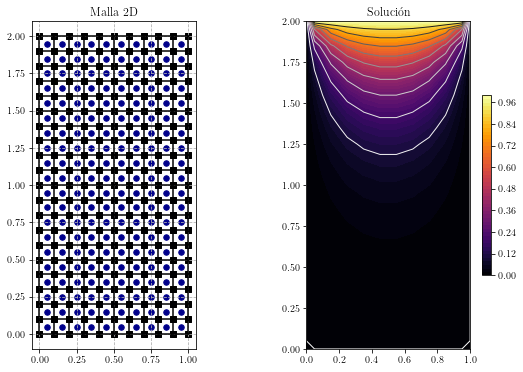

In [11]:
#
# Coordenadas de la malla para FVM
#
x, y, _ = malla.coordinatesMeshFVM()
#
# Visualización
#
par = [{'aspect':'equal', 'title':'Malla 2D'},
       {'aspect':'equal', 'title':'Solución'}]   
v1 = flx.Plotter(1,2,par,{'figsize':(8,5)}) 
#
# Malla
v1.plot_mesh(1, malla, vol='o', nod='s') 
#
# Contornos
con = v1.contourf(2,x,y,T,{'levels':50, 'cmap':'inferno'})
v1.contour(2,x,y,T,{'levels':10, 'linewidths':1.0, 'cmap':'Greys'})
v1.colorbar(2, con, {'shrink':0.55, 'orientation':'vertical'})
v1.show()

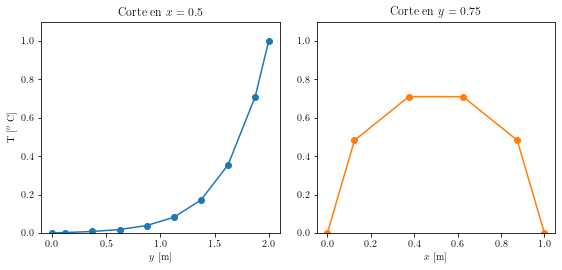

In [7]:
#
# Graficación de Temperatura vs posición
#
par2 = [{'title':'Corte en $x=0.5$', 'xlabel':'$y$ [m]', 'ylabel':'T [$^o$ C]', 'ylim':(0,1.1)},
        {'title':'Corte en $y=0.75$', 'xlabel':'$x$ [m]', 'ylim':(0,1.1)}]   
v2 = flx.Plotter(1, 2, par2,{'figsize':(8,4)})
v2.plot(1, y, T[:,2], {'ls':'-','marker':'o', 'c':'C0'})
v2.plot(2, x, T[-2,:], {'ls':'-','marker':'o', 'c':'C1'})

In [34]:
# Podemos guardar las gráficas de los Plotters en archivos PDF
v1.fig.savefig('Solucion2D.pdf')
v2.fig.savefig('Cortes_Sol2D.pdf')